In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
from matplotlib import pylab, cm
%matplotlib inline
import pylab
from numpy import array, pi,linspace
from astropy.io import fits
import math
from math import log
from astropy.table import Table
import pyfits

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
hdul = fits.open('adjusted.fits')
data = hdul[1].data
flux_tot = data.field('Total_flux') # Obtain the total flux column 
z = data.field('z_best') # Obtain redshift column
Flux_22 = data.field('w4Flux') # Obtain 22 microns flux
Flux_g = data.field('gFApflux') # Obtain flux for g band
dc_major = data.field('DC_maj')
lgz = data.field('LGZ_size')

In [5]:
#Import package in order to get the function for Luminosity

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

In [6]:
# Luminosity Distance
Lum_d22 = array(cosmo.luminosity_distance([Flux_22])*3.08567758e24) ### Last number converts it into cm
Lum_d = array(cosmo.luminosity_distance([flux_tot])*3.08567758e24) ### Last number converts it into cm
Lum_dG = array(cosmo.luminosity_distance([Flux_g])*3.08567758e24) ### Last number converts it into cm

In [8]:
# Luminosity based on redshift and distance
def power(d,f,z):
    P = (4*pi*(d)**2*f*1e-26/(1+z))
    return P
Pw22 = (power(Lum_d22,Flux_22,z))
Pw_g  = (power(Lum_dG,Flux_g,z))
Pw = power(Lum_d,flux_tot,z)


In [9]:
adj = np.where(Pw22>=4e43)
#adj1 = np.where(Pw>=4e43)
Pw_adj = array((Pw22[adj])) # This is the luminosity at 22 microns
Pw_adj1 = array((Pw[adj])) # This is the luminosity at 151 MHz
Pw_g_H = array((Pw_g[adj])) # Optical luminosity >> This is the one to use to distinguish H & L

In [10]:
## Convert erg to J >>> WHz^-1
L_low_f = Pw_adj1*1e-7
L_mid_IR = Pw_adj*1e-7
L_opti = Pw_g_H*1e-7

z_new  = z[:5776,]


# Result of Crossmatch

In [11]:
hdul2 = fits.open('crossmatch1.fits')
data = hdul2[1].data
flux = data.field('Total_flux') # Obtain the total flux column 
redshift = data.field('z_best') # Obtain redshift column
flux_22 = data.field('w4Flux') # Obtain 22 microns flux
flux_g = data.field('gFApflux') # Obtain flux for g band

In [12]:
Q_d = array(cosmo.luminosity_distance([flux_g])*3.08567758e24) 
pw_g  = (power(Q_d,flux_g,redshift))
#Quasar_opti_P = Pw_g*1e-7


Lum_D = array(cosmo.luminosity_distance([flux])*3.08567758e24) 
pw = (power(Lum_D,flux,redshift))
#(1+redshift)**(-0.7)

Lum_D22 = array(cosmo.luminosity_distance([flux_22])*3.08567758e24)
pw22 = (power(Lum_D22,flux_22,redshift))

Adj = np.where(pw22>=4e43)

# FIND DATA FOR QUASARS

Quasar_mid_IR = array((pw22[Adj])*1e-7)
Quasar_Low_P = array((pw[Adj])*1e-7) 
Quasar_opti_P = array((pw_g[Adj])*1e-7)

z_QSO = redshift[:432,]


In [13]:
# FIND DATA FOR RADIO GALAXIES


RG_low = (set(L_low_f)-set(Quasar_Low_P))
P_RG_low  = array(list(RG_low))

RG_IR = (set(L_mid_IR)-set(Quasar_mid_IR))
P_RG_IR  = array(list(RG_IR))

RG_opti = (set(L_opti)-set(Quasar_opti_P))
P_RG_opti  = array(list(RG_opti))


z_RG = z[:5344,]

# Linear Size Classification

In [779]:
# Import desired parameters >>> DC_maj and LGZ size

dc_maj = data.field('DC_maj')
DC_maj = array(dc_maj)
A = data.field('LGZ_size')
LGZ = np.nan_to_num(A)
DC_MAJ = (np.nan_to_num(DC_maj))


# Calculate angular distance using python function

ad_QSO = array(cosmo.angular_diameter_distance(z_QSO)) #This is in Kiloparsecs
ad_RG = array(cosmo.angular_diameter_distance(z_RG))


In [788]:
dc_rg = (set(dc_major)-set(DC_maj))
DC_RG1  = array(list(dc_rg))

lgz_rg = (set(lgz)-set(A))
LGZ_RG1  = array(list(lgz_rg))

DC_RG = (np.nan_to_num(DC_RG1))*2  ### Deconvolved size for radio galaxies

LGZ_RG  = np.nan_to_num(LGZ_RG1)    ### LGZ for radio galaxies

In [789]:
## Loop that chooses LGZ instead of DC_maj for Quasars
for i in np.arange(len(DC_MAJ)):
    if (LGZ[i]==0):
        print (DC_MAJ)
    else:
        DC_MAJ[i] = LGZ[i]

[ 0.         39.33596014  0.         ... 64.66238472  9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ... 64.66238472  9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ... 64.66238472  9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ... 64.66238472  9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ... 64.66238472  9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ... 64.66238472  9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ... 64.66238472  9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ... 64.66238472  9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ... 64.66238472  9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ... 64.66238472  9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ... 64.66238472  9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ... 64.66238472  9.71847447
  5.90735792]
[ 0.         39.33596014  0.         ... 64.66238472

In [790]:
for i in np.arange(len(DC_RG)):
    if (LGZ_RG[i]==0):
        print (DC_RG)
    else:
        DC_RG[i] = LGZ_RG[i]

[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643 14.21552981
  7.57794346]
[ 0.          0.          0.         ...  7.81678643

In [791]:
def LZ(ang_d,dc):
    linear_size = ang_d*dc*(np.pi/180)
    return linear_size

In [833]:
a = DC_MAJ[DC_MAJ != 0]
a1 = a[:432,]
b = DC_RG[DC_RG != 0]
b1 =b[:5344,]

L_QSO = array(LZ(ad_QSO,a1))
L_RG = array(LZ(ad_RG,b1))

# Linear Size classification

In [841]:
def Binselect(p,q,r):
    Select = p[(p >= q) & (p <= r)]
    return array(Select)
Binselect(Total_P,1e23,1e26).shape

def Square(x,z,mn,mx):
    select = x[(z >= mn) & (z <= mx)]
    return array(select[:,2])


In [842]:
P_qso1 =  Binselect(Quasar_Low_P,1e23,1e26)
Z_qso1 = z_QSO[:254,]
a = L_QSO[L_QSO != 0]
L_qso1 = a[:254,]
Bin1_qso = np.vstack((P_qso1,Z_qso1,L_qso1)).T
bin1_qso = Bin1_qso[Bin1_qso[:,2].argsort()]


P_rg1 = Binselect(P_RG_low,1e23,1e26)
Z_rg1= z_RG[:2488,]
b = L_RG[L_RG != 0]
L_rg1 = b[:2488,]
Bin1_rg = np.vstack((P_rg1,Z_rg1,L_rg1)).T
bin1_rg = Bin1_rg[Bin1_rg[:,2].argsort()]

P_qso2 =  Binselect(Quasar_Low_P,1e26,1e28)
Z_qso2 = z_QSO[:106,]
L_qso2 = a[:106,]
Bin2_qso = np.vstack((P_qso2,Z_qso2,L_qso2)).T
bin2_qso = Bin2_qso[Bin2_qso[:,2].argsort()]

P_rg2 = Binselect(P_RG_low,1e26,1e28)
Z_rg2 = z_RG[:2313,]
L_rg2 = b[:2313,]
Bin2_rg = np.vstack((P_rg2,Z_rg2,L_rg2)).T
bin2_rg = Bin2_rg[Bin2_rg[:,2].argsort()]


P_qso3 =  Binselect(Quasar_Low_P,1e28,1e30)
Z_qso3= z_QSO[:31,]
L_qso3 = a[:31,]
Bin3_qso = np.vstack((P_qso3,Z_qso3,L_qso3)).T
bin3_qso = Bin3_qso[Bin3_qso[:,2].argsort()]

P_rg3 = Binselect(P_RG_low,1e28,1e30)
Z_rg3 = z_RG[:442,]
L_rg3 = b[:442,]
Bin3_rg = np.vstack((P_rg3,Z_rg3,L_rg3)).T
bin3_rg = Bin3_rg[Bin3_rg[:,2].argsort()]

In [836]:
Square(bin3_rg,Z_rg3,1.75,2.00).shape

(9,)

# Linear Size Ratio

In [516]:
import statistics 

def Median(x,z,mn,mx):
    value = x[(z >= mn) & (z <= mx)]
    return statistics.median(value[:,2])
def median(x,z,mn,mx,n):
    v = x[(z >= mn) & (z <= mx)]
    return statistics.median(v[:n,2])

def Selection(x,z,mn,mx):
    Value = x[(z >= mn) & (z <= mx)]
    return array(Value[:,0])

In [455]:
p1 = Binselect(L_low_f,1e23,1e26)
z1 = z_new[:2742,]
pz1 = np.vstack((p1,z1)).T

p2 = Binselect(L_low_f,1e26,1e28)
z2 = z_new[:2419,]
pz2 = np.vstack((p2,z2)).T

p3 = Binselect(L_low_f,1e28,1e30)
z3 = z_new[:473,]
pz3 = np.vstack((p3,z3)).T

In [323]:
Binselect(L_low_f,1e28,1e30).shape

(473,)

In [875]:
print(Median(bin1_rg,Z_rg1,0.25,0.50)/Median(bin1_qso,Z_qso1,0.25,0.50),
     Median(bin1_rg,Z_rg1,0.50,0.75)/Median(bin1_qso,Z_qso1,0.50,0.75),
     Median(bin1_rg,Z_rg1,0.75,1.00)/Median(bin1_qso,Z_qso1,0.75,1.00),
     Median(bin1_rg,Z_rg1,1.00,1.25)/Median(bin1_qso,Z_qso1,1.00,1.25),
     Median(bin1_rg,Z_rg1,1.25,1.50)/Median(bin1_qso,Z_qso1,1.25,1.50),
     Median(bin1_rg,Z_rg1,1.5,1.75)/Median(bin1_qso,Z_qso1,1.5,1.75))

1.2643996183128665 1.2211937316026538 1.3508052467909837 1.4485657626105115 1.2416029490476248 1.4163146316805368


Text(0.5,0.98,'1e24 < Power < 1e26')

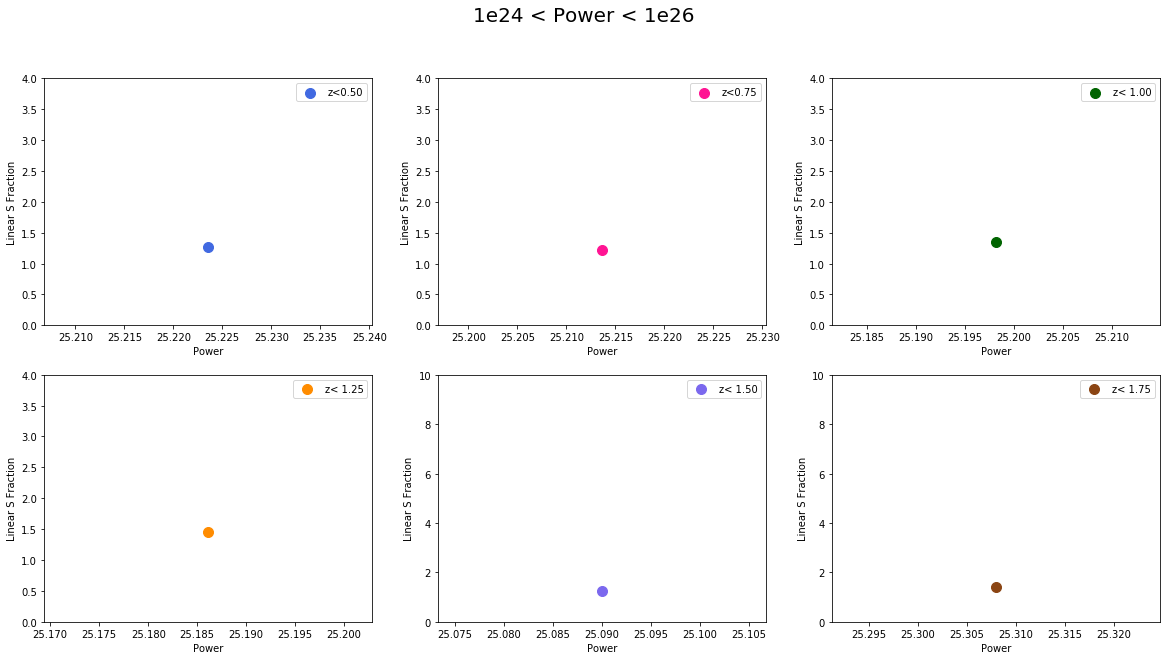

In [884]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 =  f.add_subplot(233)
ax4 =  f.add_subplot(234)
ax5 = f.add_subplot(235)
ax6 =  f.add_subplot(236)


ax1.scatter(np.log10(1.673305612552026e+25),1.2643996183128665, c='royalblue',s = 100,label='z<0.50')
ax1.legend()
ax1.set_xlabel('Power')
ax1.set_ylabel('Linear S Fraction')
ax1.set_ylim(0,4)

ax2.scatter(np.log10(1.6355087347535477e+25),1.2211937316026538, c='deeppink',s = 100, label='z<0.75')
ax2.set_xlabel('Power')
ax2.set_ylabel('Linear S Fraction')
ax2.set_ylim(0,4)
ax2.legend()

ax3.scatter(np.log10(1.578221605744241e+25),1.3508052467909837, c='darkgreen',s=100,label='z< 1.00')
ax3.set_xlabel('Power')
ax3.set_ylabel('Linear S Fraction')
ax3.set_ylim(0,4)
ax3.legend()

ax4.scatter(np.log10(1.5351084562736022e+25),1.4485657626105115, s = 100, c = 'darkorange', label = 'z< 1.25')
ax4.set_ylim(0,4)
ax4.set_xlabel('Power')
ax4.set_ylabel('Linear S Fraction')
ax4.legend(loc=1)

ax5.scatter(np.log10(1.2303887393650335e+25),1.2416029490476248, s = 100,c='mediumslateblue',label='z< 1.50')
ax5.set_xlabel('Power')
ax5.set_ylabel('Linear S Fraction')
ax5.set_ylim(0,10)
ax5.legend(loc=1)

ax6.scatter(np.log10(2.032265728777818e+25),1.4163146316805368,s =100, c='saddlebrown',label='z< 1.75')
ax6.set_xlabel('Power')
ax6.set_ylabel('Linear S Fraction')
ax6.set_ylim(0,10)
ax6.legend()

plt.suptitle('1e24 < Power < 1e26', fontsize=20)

In [1030]:
print(Median(bin1_rg,Z_rg1,1.75,2.00)/Median(bin1_qso,Z_qso1,1.75,2.00),
     Median(bin2_rg,Z_rg2,1.75,2.00)/Median(bin2_qso,Z_qso2,1.75,2.00),
     Median(bin3_rg,Z_rg3,1.75,2.00)/Median(bin3_qso,Z_qso3,1.75,2.00),
     Median(bin3_rg,Z_rg3,1.00,1.25)/Median(bin3_qso,Z_qso3,1.00,1.25),
     Median(bin3_rg,Z_rg3,1.25,1.50)/Median(bin3_qso,Z_qso3,1.25,1.50),
     Median(bin3_rg,Z_rg3,1.5,1.75)/Median(bin3_qso,Z_qso3,1.5,1.75))

1.3490071535340344 1.2369148740894655 1.0458164180587322 4.735191401325649 0.9967549049440957 0.9538380502146946


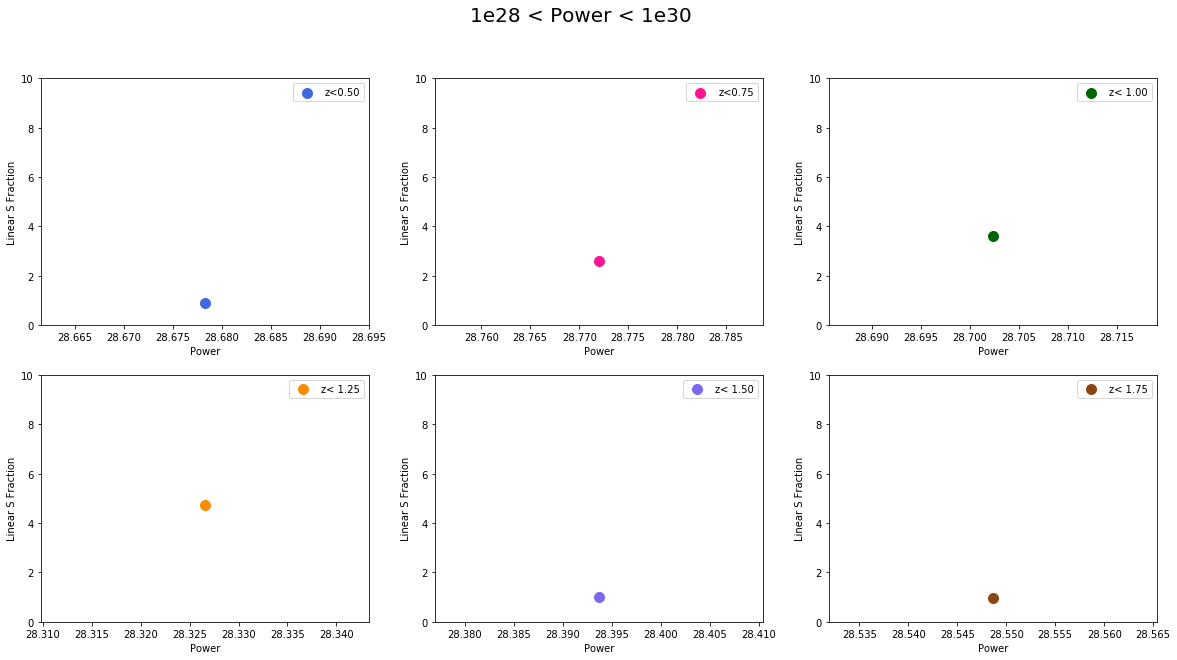

In [897]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 =  f.add_subplot(233)
ax4 =  f.add_subplot(234)
ax5 = f.add_subplot(235)
ax6 =  f.add_subplot(236)


ax1.scatter(np.log10(4.767527442434798e+28),0.9197090832972978, c='royalblue',s = 100,label='z<0.50')
ax1.legend()
ax1.set_xlabel('Power')
ax1.set_ylabel('Linear S Fraction')
ax1.set_ylim(0,10)

ax2.scatter(np.log10(5.915639800428714e+28), 2.6144834046834444 , c='deeppink',s = 100,label='z<0.75')
ax2.set_xlabel('Power')
ax2.set_ylabel('Linear S Fraction')
ax2.legend()
ax2.set_ylim(0,10)

ax3.scatter(np.log10(5.039115193657703e+28),3.62012731512251, c='darkgreen',s = 100,label='z< 1.00')
ax3.set_xlabel('Power')
ax3.set_ylabel('Linear S Fraction')
ax3.set_ylim(0,10)
ax3.legend()


ax4.scatter(np.log10(2.121152919415858e+28),4.735191401325649, c = 'darkorange',s = 100, label = 'z< 1.25')
ax4.set_ylim(0,10)
ax4.set_xlabel('Power')
ax4.set_ylabel('Linear S Fraction')
ax4.legend(loc=1)

ax5.scatter(np.log10(2.475692507581263e+28),0.9967549049440957, c='mediumslateblue',s = 100,label='z< 1.50')
ax5.set_xlabel('Power')
ax5.set_ylabel('Linear S Fraction')
ax5.set_ylim(0,10)
ax5.legend(loc=1)

ax6.scatter(np.log10(3.536845318848249e+28),0.9538380502146946, c='saddlebrown',s = 100,label='z< 1.75')
ax6.set_xlabel('Power')
ax6.set_ylabel('Linear S Fraction')
ax6.set_ylim(0,10)
ax6.legend()

plt.suptitle('1e28 < Power < 1e30', fontsize=20)
plt.show()

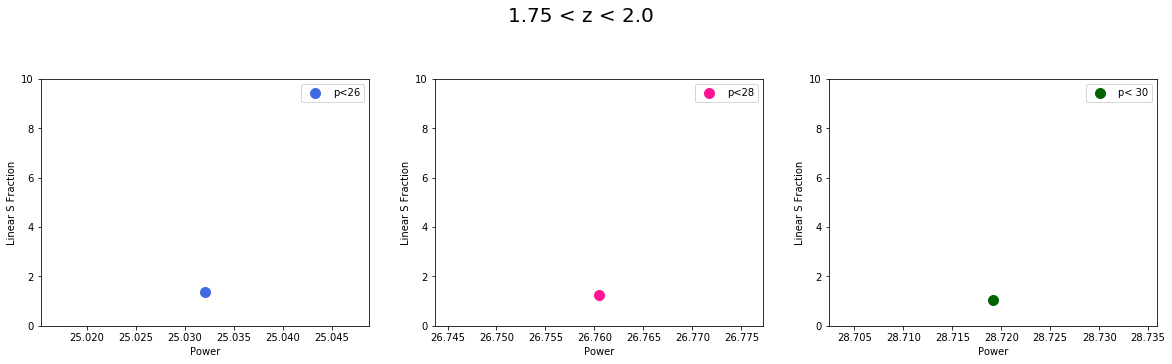

In [899]:
f = plt.figure(figsize=(20,10))
ax1 = f.add_subplot(231)
ax2 = f.add_subplot(232)
ax3 =  f.add_subplot(233)


ax1.scatter(np.log10(1.076633237284778e+25),1.3490071535340344, c='royalblue',s = 100,label='p<26')
ax1.legend()
ax1.set_xlabel('Power')
ax1.set_ylabel('Linear S Fraction')
ax1.set_ylim(0,10)

ax2.scatter(np.log10(5.760341242734956e+26),1.2369148740894655, c='deeppink',s = 100,label='p<28')
ax2.set_xlabel('Power')
ax2.set_ylabel('Linear S Fraction')
ax2.legend()
ax2.set_ylim(0,10)

ax3.scatter(np.log10(5.237573279238907e+28),1.0458164180587322, c='darkgreen',s = 100,label='p< 30')
ax3.set_xlabel('Power')
ax3.set_ylabel('Linear S Fraction')
ax3.set_ylim(0,10)
ax3.legend()




plt.suptitle('1.75 < z < 2.0', fontsize=20)
plt.show()

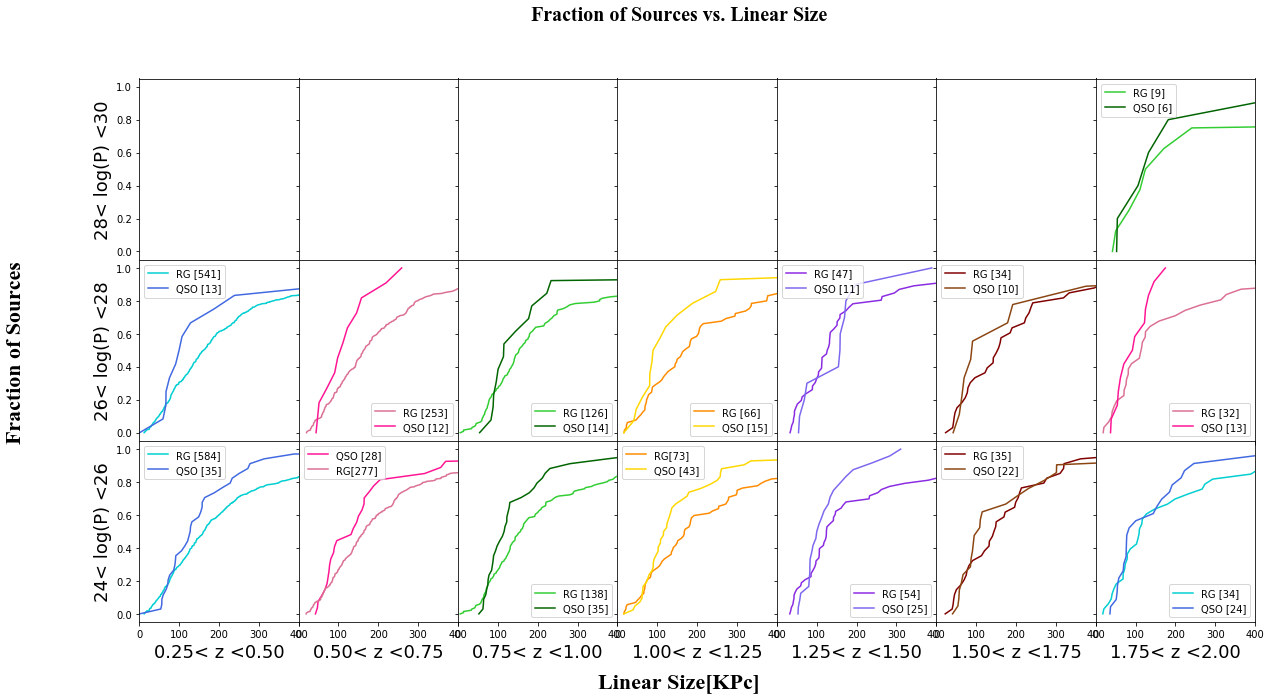

In [969]:
csfont = {'fontname':'Times New Roman'}

fig, axes  = plt.subplots(nrows=3, ncols=7, sharex=True, sharey=True,figsize = (20,10))
axes[2,0].plot(Square(bin1_rg,Z_rg1,0.25,0.50),np.linspace(0,1.0,num=584), c = 'darkturquoise', label = 'RG [584]')
axes[2,0].plot(Square(bin1_qso,Z_qso1,0.25,0.50),np.linspace(0,1.0,num=35), c='royalblue',label='QSO [35]')
axes[2,0].legend()
axes[2,0].set_xlabel('0.25< z <0.50',fontsize=18)
axes[2,0].set_ylabel('24< log(P) <26',fontsize=18)

axes[2,1].plot(Square(bin1_qso,Z_qso1,0.50,0.75),np.linspace(0,1.0,num=28), c='deeppink',label='QSO [28]')
axes[2,1].plot(Square(bin1_rg,Z_rg1,0.50,0.75),np.linspace(0,1.0,num=277), c = 'palevioletred', label = 'RG[277]')
axes[2,1].legend()
axes[2,1].set_xlabel('0.50< z <0.75',fontsize=18)

axes[2,2].plot(Square(bin1_rg,Z_rg1,0.75,1.00),np.linspace(0,1.0,num=138), c = 'limegreen', label = 'RG [138]')
axes[2,2].plot(Square(bin1_qso,Z_qso1,0.75,1.00),np.linspace(0,1.0,num=35), c='darkgreen',label='QSO [35]')
axes[2,2].legend()
axes[2,2].set_xlabel('0.75< z <1.00',fontsize=18)

axes[2,3].plot(Square(bin1_rg,Z_rg1,1.00,1.25),np.linspace(0,1.0,num=73), c = 'darkorange', label = 'RG[73]')
axes[2,3].plot(Square(bin1_qso,Z_qso1,1.00,1.25),np.linspace(0,1.0,num=43), c='gold',label='QSO [43]')
axes[2,3].legend()
axes[2,3].set_xlabel('1.00< z <1.25',fontsize=18)

axes[2,4].plot(Square(bin1_rg,Z_rg1,1.25,1.50),np.linspace(0,1.0,num=54), c = 'blueviolet', label = 'RG [54]')
axes[2,4].plot(Square(bin1_qso,Z_qso1,1.25,1.50),np.linspace(0,1.0,num=25), c='mediumslateblue',label='QSO [25]')
axes[2,4].legend()
axes[2,4].set_xlabel('1.25< z <1.50',fontsize=18)

axes[2,5].plot(Square(bin1_rg,Z_rg1,1.50,1.75),np.linspace(0,1.0,num=35), c = 'maroon', label = 'RG [35]')
axes[2,5].plot(Square(bin1_qso,Z_qso1,1.50,1.75),np.linspace(0,1.0,num=22), c='saddlebrown',label='QSO [22]')
axes[2,5].legend()
axes[2,5].set_xlabel('1.50< z <1.75',fontsize=18)

axes[2,6].plot(Square(bin1_rg,Z_rg1,1.75,2.00),np.linspace(0,1.0,num=34), c = 'darkturquoise', label = 'RG [34]')
axes[2,6].plot(Square(bin1_qso,Z_qso1,1.75,2.00),np.linspace(0,1.0,num=24), c='royalblue',label='QSO [24]')
axes[2,6].legend()
axes[2,6].set_xlabel('1.75< z <2.00',fontsize=18)

axes[1,0].plot(Square(bin2_rg,Z_rg2,0.25,0.50),np.linspace(0,1.0,num=541), c = 'darkturquoise', label = 'RG [541]')
axes[1,0].plot(Square(bin2_qso,Z_qso2,0.25,0.50),np.linspace(0,1.0,num=13), c='royalblue',label='QSO [13]')
axes[1,0].legend()
axes[1,0].set_ylabel('26< log(P) <28',fontsize=18)


axes[1,1].plot(Square(bin2_rg,Z_rg2,0.50,0.75),np.linspace(0,1.0,num=253), c = 'palevioletred', label = 'RG [253]')
axes[1,1].plot(Square(bin2_qso,Z_qso2,0.50,0.75),np.linspace(0,1.0,num=12), c='deeppink',label='QSO [12]')
axes[1,1].legend()

axes[1,2].plot(Square(bin2_rg,Z_rg2,0.75,1.00),np.linspace(0,1.0,num=126), c = 'limegreen', label = 'RG [126]')
axes[1,2].plot(Square(bin2_qso,Z_qso2,0.75,1.00),np.linspace(0,1.0,num=14), c='darkgreen',label='QSO [14]')
axes[1,2].legend()

axes[1,3].plot(Square(bin2_rg,Z_rg2,1.00,1.25),np.linspace(0,1.0,num=66), c = 'darkorange', label = 'RG [66]')
axes[1,3].plot(Square(bin2_qso,Z_qso2,1.00,1.25),np.linspace(0,1.0,num=15), c='gold',label='QSO [15]')
axes[1,3].legend()

axes[1,4].plot(Square(bin2_rg,Z_rg2,1.25,1.50),np.linspace(0,1.0,num=47), c = 'blueviolet', label = 'RG [47]')
axes[1,4].plot(Square(bin2_qso,Z_qso2,1.25,1.50),np.linspace(0,1.0,num=11), c='mediumslateblue',label='QSO [11]')
axes[1,4].legend(loc=2)

axes[1,5].plot(Square(bin2_rg,Z_rg2,1.50,1.75),np.linspace(0,1.0,num=34), c = 'maroon', label = 'RG [34]')
axes[1,5].plot(Square(bin2_qso,Z_qso2,1.50,1.75),np.linspace(0,1.0,num=10), c='saddlebrown',label='QSO [10]')
axes[1,5].legend()

axes[1,6].plot(Square(bin2_rg,Z_rg2,1.75,2.00),np.linspace(0,1.0,num=32), c = 'palevioletred', label = 'RG [32]')
axes[1,6].plot(Square(bin2_qso,Z_qso2,1.75,2.00),np.linspace(0,1.0,num=13), c='deeppink',label='QSO [13]')
axes[1,6].legend()

axes[0,6].plot(Square(bin3_rg,Z_rg3,1.75,2.00),np.linspace(0,1.0,num=9), c = 'limegreen', label = 'RG [9]')
axes[0,6].plot(Square(bin3_qso,Z_qso3,1.75,2.00),np.linspace(0,1.0,num=6), c='darkgreen',label='QSO [6]')
axes[0,6].set_xlim(0,400)
axes[0,6].legend()

axes[0,0].set_ylabel('28< log(P) <30',fontsize=18)


plt.subplots_adjust(wspace=0,hspace=0)
fig.text(0.5, 0.04, 'Linear Size[KPc]', va='center', ha='center',fontsize=22,**csfont)
fig.text(0.04, 0.5, 'Fraction of Sources', va='center', ha='center', rotation='vertical',fontsize=22,**csfont)
plt.suptitle('Fraction of Sources vs. Linear Size', fontsize=20,**csfont)
plt.savefig('alltogether.png')
plt.show()


In [1005]:
ranges1  = np.linspace(5e25, 1e28, num=21)
rangesz = np.linspace(0.25, 2.00, num=7)

In [1001]:
P24_26 = array([1.26439962, 1.22119373, 1.35080525, 1.44856576, 1.24160295,1.41631463,1.34900715])
P26_28 = array([1.60617509, 1.5600296 , 1.33296554, 1.87702694, 0.79809862,1.73078475,1.23691487])
P28_30 = array([0.91970908, 2.6144834 , 3.62012732, 4.7351914 , 0.9967549 ,0.95383805,1.04581641])
Ratio = array([1.26439962, 1.22119373, 1.35080525, 1.44856576, 1.24160295,1.41631463,1.34900715,1.60617509, 1.5600296 , 1.33296554, 1.87702694, 0.79809862,1.73078475,1.23691487,0.91970908, 2.6144834 , 3.62012732, 4.7351914 , 0.9967549 ,0.95383805,1.04581641])

In [1016]:
from statsmodels import robust
print (robust.mad(Ratio, axis=0),robust.mad(ranges1, axis=0))


0.3812777583725155 3.6879730185326847e+27


In [1067]:
e_bin1 = array([0.05291968657757566,0.17533582192081792,0.15952346968352787,0.14903491663374513,0.1331455342012097,0.1357658439681133,0.2039757760383274])
e_bin2 = array([0.05805834224685968,0.10945005777262201,0.08997015547253004,0.1984448737825139,0.036894649701568645,0.21218959146204563,0.0773778027461926])
e_bin3 = array([0.010896844479327523,0.12521001231138404,0.08665493670628098,0.13626396577292577,0.07205321637998548,0.07455947313782633,0.11293659895091354])

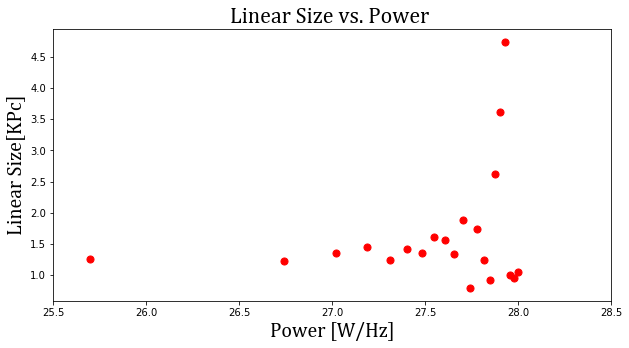

In [1002]:
bsfont = {'fontname':'Cambria Math'}

f = plt.figure(figsize=(10,5))
plt.scatter(np.log10(ranges1),Ratio,c='red',s=50)
plt.xlim(25.5,28.5)
plt.ylabel('Linear Size[KPc]', fontsize = 20,**bsfont)
plt.xlabel('Power [W/Hz]', fontsize=20,**bsfont)
plt.title('Linear Size vs. Power ',fontsize=22,**bsfont)

plt.show()


In [ ]:
f = plt.figure(figsize=(10,5))
plt.scatter(rangesz,P24_26,c='red',s=50, label = '24<P<26')
plt.scatter(rangesz,P26_28,c = 'blue',s=50,label = '26<P<28')
plt.scatter(rangesz,P28_30,c = 'green',s=50,label = '28<P<30')
plt.ylabel('Linear Size[KPc]', fontsize = 20,**bsfont)
plt.xlabel('Redshift [W/Hz]', fontsize=20,**bsfont)
plt.title('Linear Size vs. Redshift',fontsize=22,**bsfont)
plt.legend()
plt.show()

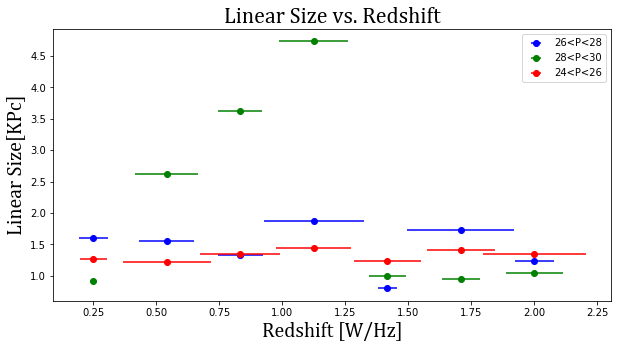

In [1073]:


f = plt.figure(figsize=(10,5))
plt.errorbar(rangesz,P26_28,xerr=e_bin2,c = 'blue',fmt='o',label = '26<P<28')
plt.errorbar(rangesz,P28_30,xerr=e_bin3,c = 'green',fmt='o',label = '28<P<30')
plt.ylabel('Linear Size[KPc]', fontsize = 20,**bsfont)
plt.xlabel('Redshift [W/Hz]', fontsize=20,**bsfont)
plt.errorbar(rangesz,P24_26, xerr=e_bin1, fmt='o',c='red',label = '24<P<26')
plt.title('Linear Size vs. Redshift',fontsize=22,**bsfont)
plt.legend()
plt.show()

In [1066]:
print(robust.mad(Square(bin3_rg,Z_rg3,0.25,0.50)[:4,]/Square(bin3_qso,Z_qso3,0.25,0.50),axis=0),
     robust.mad(Square(bin3_rg,Z_rg3,0.50,0.75)[:4,]/Square(bin3_qso,Z_qso3,0.50,0.75),axis=0),
     robust.mad(Square(bin3_rg,Z_rg3,0.75,1.00)[:4,]/Square(bin3_qso,Z_qso3,0.75,1.00),axis=0),
     robust.mad(Square(bin3_rg,Z_rg3,1.00,1.25)[:4,]/Square(bin3_qso,Z_qso3,1.00,1.25),axis=0),
     robust.mad(Square(bin3_rg,Z_rg3,1.25,1.50)[:3,]/Square(bin3_qso,Z_qso3,1.25,1.50),axis=0),
     robust.mad(Square(bin3_rg,Z_rg3,1.5,1.75)[:4,]/Square(bin3_qso,Z_qso3,1.5,1.75),axis=0),
     robust.mad(Square(bin3_rg,Z_rg3,1.75,2.00)[:6,]/Square(bin3_qso,Z_qso3,1.75,2.00),axis=0))

0.010896844479327523 0.12521001231138404 0.08665493670628098 0.13626396577292577 0.07205321637998548 0.07455947313782633 0.11293659895091354
